<a href="https://colab.research.google.com/github/cardonasebastian/PROYECTO-MLOPS/blob/main/Entrega2/Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Se carga el dataset.

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
file_path = '/content/drive/My Drive/Mlops/data/Occupancy_Estimation.csv'
df = pd.read_csv(file_path)
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


## Librerias a Ocupar

In [88]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve

In [37]:
df.shape

(10129, 19)

## Tipos de datos de columnas

In [89]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_timedelta(df["Time"])

In [90]:
df.dtypes

Date                     datetime64[ns]
Time                    timedelta64[ns]
S1_Temp                         float64
S2_Temp                         float64
S3_Temp                         float64
S4_Temp                         float64
S1_Light                          int64
S2_Light                          int64
S3_Light                          int64
S4_Light                          int64
S1_Sound                        float64
S2_Sound                        float64
S3_Sound                        float64
S4_Sound                        float64
S5_CO2                            int64
S5_CO2_Slope                    float64
S6_PIR                            int64
S7_PIR                            int64
Room_Occupancy_Count              int64
dtype: object

In [91]:
df.dtypes

Date                     datetime64[ns]
Time                    timedelta64[ns]
S1_Temp                         float64
S2_Temp                         float64
S3_Temp                         float64
S4_Temp                         float64
S1_Light                          int64
S2_Light                          int64
S3_Light                          int64
S4_Light                          int64
S1_Sound                        float64
S2_Sound                        float64
S3_Sound                        float64
S4_Sound                        float64
S5_CO2                            int64
S5_CO2_Slope                    float64
S6_PIR                            int64
S7_PIR                            int64
Room_Occupancy_Count              int64
dtype: object

## Comprobar valores faltantes

In [92]:

df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [93]:
df.describe()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,2017-12-27 08:26:49.319774720,0 days 12:00:33.714779346,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
min,2017-12-22 00:00:00,0 days 00:00:28,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,2017-12-23 00:00:00,0 days 05:27:45,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,2017-12-24 00:00:00,0 days 12:06:49,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-12-26 00:00:00,0 days 18:31:15,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,2018-01-11 00:00:00,0 days 23:59:58,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000
std,NaN,0 days 07:14:05.667721472,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633


## Valores únicos en cada columna.

In [94]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

## Extracción de Características

In [95]:
# Combina las columnas 'Date' y 'Time' del DataFrame 'df' en una nueva columna 'DateTime'
DateTime = df["Date"] + df["Time"]

# Inserta la nueva columna 'Date_Time' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Date_Time" es el nombre de la nueva columna
# value = DateTime son los valores combinados de 'Date' y 'Time'
df.insert(loc = 0, column = "Date_Time", value = DateTime)



In [96]:
# Obtiene el día de la semana a partir de la columna 'Date_Time' y le suma 1 (lunes=1, ..., domingo=7)
weekday = df['Date_Time'].dt.weekday + 1

# Inserta la nueva columna 'Day of week' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Day of week" es el nombre de la nueva columna
# value = weekday son los valores calculados del día de la semana
df.insert(loc = 0, column = "Day of week", value = weekday)

# Obtiene la hora del día a partir de la columna 'Date_Time' y le suma 1 (de 1 a 24)
dayhour = df['Date_Time'].dt.hour + 1

# Inserta la nueva columna 'Hour of day' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Hour of day" es el nombre de la nueva columna
# value = dayhour son los valores calculados de la hora del día
df.insert(loc = 0, column = "Hour of day", value = dayhour)


In [97]:
# Calcula la media de las columnas 5 a 8 (incluidas) para cada fila,
# que se supone contienen valores de temperatura, y guarda el resultado en 'temp_mean'
temp_mean = df.iloc[:,5:9].mean(axis=1)

# Inserta la nueva columna 'Mean_Temperature' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Mean_Temperature" es el nombre de la nueva columna
# value = temp_mean son los valores medios calculados de las columnas de temperatura
df.insert(loc = 0, column = "Mean_Temperature", value = temp_mean)

# Calcula la media de las columnas 9 a 12 (incluidas) para cada fila,
# que se supone contienen valores de luz, y guarda el resultado en 'light_mean'
light_mean = df.iloc[:,9:13].mean(axis=1)

# Inserta la nueva columna 'Mean_light' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Mean_light" es el nombre de la nueva columna
# value = light_mean son los valores medios calculados de las columnas de luz
df.insert(loc = 0, column = "Mean_light", value = light_mean)

# Calcula la media de las columnas 13 a 16 (incluidas) para cada fila,
# que se supone contienen valores de sonido, y guarda el resultado en 'sound_mean'
sound_mean = df.iloc[:,13:17].mean(axis=1)

# Inserta la nueva columna 'Mean_sound' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "Mean_sound" es el nombre de la nueva columna
# value = sound_mean son los valores medios calculados de las columnas de sonido
df.insert(loc = 0, column = "Mean_sound", value = sound_mean)


In [98]:
# Calcula el sonido promedio de las columnas 'S1_Sound', 'S2_Sound', 'S3_Sound' y 'S4_Sound',
# y luego lo multiplica por el promedio de las columnas 'S6_PIR' y 'S7_PIR' (con un ajuste de 0.1)
footsteps_sound = ((df['S1_Sound'] + df['S2_Sound'] + df['S3_Sound'] + df['S4_Sound']) / 4) * ((df['S6_PIR'] + df['S7_PIR'] + 0.1) / 2)

# Inserta la nueva columna 'Footsteps_Sound' en la posición 16 del DataFrame 'df'
# loc = 16 especifica la posición de la nueva columna
# column = "Footsteps_Sound" es el nombre de la nueva columna
# value = footsteps_sound son los valores calculados de la combinación de sonido y PIR
df.insert(loc = 16, column = "Footsteps_Sound", value = footsteps_sound)

# Calcula el nivel PIR sumando las columnas 'S6_PIR' y 'S7_PIR'
pir_level = df['S6_PIR'] + df['S7_PIR']

# Inserta la nueva columna 'PIR_Level' en la posición 17 del DataFrame 'df'
# loc = 17 especifica la posición de la nueva columna
# column = "PIR_Level" es el nombre de la nueva columna
# value = pir_level son los valores sumados de las columnas PIR
df.insert(loc = 17, column = "PIR_Level", value = pir_level)


In [99]:
# Calcula una ventana móvil (rolling window) de tamaño 10 sobre la columna 'S5_CO2'
rolling = df['S5_CO2'].rolling(window=10)

# Calcula la media móvil (moving average) de los valores en la ventana móvil
rolling_mean = rolling.mean()

# Inserta la nueva columna 'MA_CO2' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "MA_CO2" es el nombre de la nueva columna
# value = rolling_mean son los valores calculados de la media móvil de la columna 'S5_CO2'
df.insert(loc = 0, column = "MA_CO2", value = rolling_mean)


In [100]:
# Calcula una ventana móvil (rolling window) de tamaño 10 sobre la columna 'S5_CO2'
rolling = df['S5_CO2'].rolling(window=10)

# Calcula la varianza móvil (moving variance) de los valores en la ventana móvil
rolling_variance = rolling.var()

# Inserta la nueva columna 'MV_CO2' al inicio del DataFrame 'df'
# loc = 0 especifica la posición de la nueva columna
# column = "MV_CO2" es el nombre de la nueva columna
# value = rolling_variance son los valores calculados de la varianza móvil de la columna 'S5_CO2'
df.insert(loc = 0, column = "MV_CO2", value = rolling_variance)


In [101]:
df.head(10)

,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,Date_Time,Date,Time,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,NaN,NaN,23.3175,58.345,24.9075,11,5,2017-12-22 10:49:41,2017-12-22,0 days 10:49:41,...,0,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,NaN,NaN,23.4950,58.110,24.9225,11,5,2017-12-22 10:50:12,2017-12-22,0 days 10:50:12,...,0,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,NaN,NaN,23.3850,58.360,24.9225,11,5,2017-12-22 10:50:42,2017-12-22,0 days 10:50:42,...,0,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,NaN,NaN,23.3775,58.360,24.9375,11,5,2017-12-22 10:51:13,2017-12-22,0 days 10:51:13,...,0,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,NaN,NaN,23.5600,58.610,24.9375,11,5,2017-12-22 10:51:44,2017-12-22,0 days 10:51:44,...,0,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,NaN,NaN,23.5475,58.610,24.9525,11,5,2017-12-22 10:52:14,2017-12-22,0 days 10:52:14,...,0,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,NaN,NaN,23.9275,58.360,24.9375,11,5,2017-12-22 10:52:45,2017-12-22,0 days 10:52:45,...,1,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,NaN,NaN,23.7875,58.610,24.9525,11,5,2017-12-22 10:53:15,2017-12-22,0 days 10:53:15,...,0,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,NaN,NaN,24.7850,59.625,24.9675,11,5,2017-12-22 10:53:46,2017-12-22,0 days 10:53:46,...,0,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,0.0,390.0,26.1200,54.375,24.9675,11,5,2017-12-22 10:54:17,2017-12-22,0 days 10:54:17,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [102]:
# Elimina todas las filas que contienen valores NaN en el DataFrame 'df'
df = df.dropna()

# Reinicia los índices del DataFrame 'df' después de eliminar las filas con NaN
df = df.reset_index()

# Elimina la columna 'index' que se creó al reiniciar los índices
# axis=1 especifica que se debe eliminar una columna (en lugar de una fila)
df = df.drop(['index'], axis=1)

# Muestra las primeras filas del DataFrame 'df' para verificar los cambios
df.head()


,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,Date_Time,Date,Time,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.0,390.0,26.1200,54.375,24.9675,11,5,2017-12-22 10:54:17,2017-12-22,0 days 10:54:17,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
1,0.0,390.0,25.6275,59.860,24.9675,11,5,2017-12-22 10:54:47,2017-12-22,0 days 10:54:47,...,2,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1
2,0.0,390.0,25.3875,60.125,24.9825,11,5,2017-12-22 10:55:18,2017-12-22,0 days 10:55:18,...,1,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1
3,0.0,390.0,25.0900,60.125,25.0175,11,5,2017-12-22 10:55:49,2017-12-22,0 days 10:55:49,...,1,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1
4,0.0,390.0,25.7175,60.140,25.0150,11,5,2017-12-22 10:56:19,2017-12-22,0 days 10:56:19,...,1,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1


## Graficas de comportamiento.

In [103]:
df = df.loc[df['Date']=='2017/12/22']

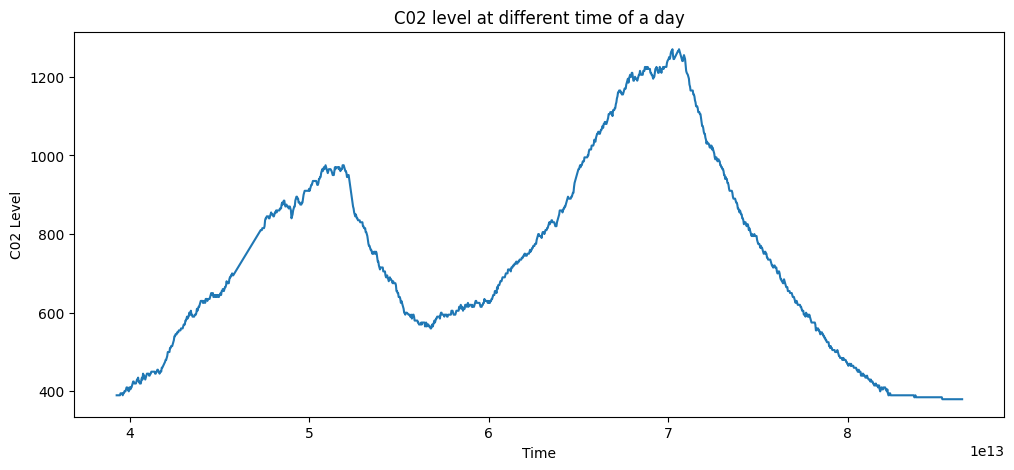

In [104]:
plt.figure( figsize = (12, 5))
sns.lineplot(x = 'Time', y = 'S5_CO2', data = df)
plt.xlabel('Time')
plt.ylabel('C02 Level')
plt.title('C02 level at different time of a day')
plt.show()


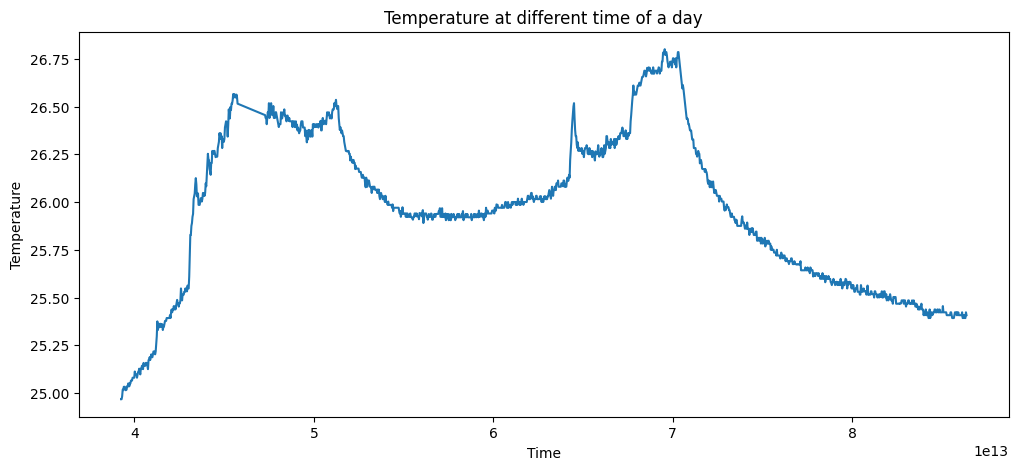

In [105]:
plt.figure( figsize = (12, 5))
sns.lineplot(x = 'Time', y = 'Mean_Temperature', data = df)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature at different time of a day')
plt.show()

In [106]:
df = df.drop(['Date', 'Time', 'Date_Time'], axis=1)
df.head()

,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,S1_Temp,S2_Temp,S3_Temp,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.0,390.0,26.1200,54.375,24.9675,11,5,25.00,24.81,24.56,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
1,0.0,390.0,25.6275,59.860,24.9675,11,5,25.06,24.81,24.56,...,2,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1
2,0.0,390.0,25.3875,60.125,24.9825,11,5,25.06,24.81,24.56,...,1,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1
3,0.0,390.0,25.0900,60.125,25.0175,11,5,25.06,24.88,24.63,...,1,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1
4,0.0,390.0,25.7175,60.140,25.0150,11,5,25.06,24.81,24.63,...,1,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1


## Ajuste de muestras

In [107]:
# Cuenta la cantidad de ocurrencias de cada valor en la columna 'Room_Occupancy_Count'
class_count = df['Room_Occupancy_Count'].value_counts()

# Define las etiquetas de las clases esperadas (ocupación de la habitación)
labels = [0, 1, 2, 3]

# Inicializa una lista 'classes' con ceros, del mismo tamaño que 'class_count'
classes = [0] * len(class_count)

# Llena la lista 'classes' con subconjuntos del DataFrame 'df' para cada valor en 'labels'
for index in range(len(class_count)):
  # Filtra el DataFrame 'df' para cada valor en 'labels' y lo asigna a 'classes' en la posición correspondiente
  classes[index] = df[df['Room_Occupancy_Count'] == labels[index]]

# Imprime la forma (shape) de cada clase para verificar la distribución de datos
for index in range(len(classes)):
  print('class ' + str(index) + ':', classes[index].shape)


class 0: (637, 26)
class 1: (196, 26)
class 2: (257, 26)
class 3: (363, 26)


In [108]:
data=df.values

In [109]:
features, label = data[:, :-1], data[:, -1]

In [110]:
features = features.astype('float32')

## Escalacion de los datos

In [111]:
# Crea una instancia del escalador estándar (StandardScaler) de scikit-learn
scaler = StandardScaler()

# Ajusta el escalador a los datos de 'features' y luego transforma estos datos,
# escalándolos para que tengan media 0 y desviación estándar 1
scaled_features = scaler.fit_transform(features)


In [112]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
# 'features' son las características de entrada
# 'label' es la etiqueta o variable objetivo
# 'test_size = 0.20' especifica que el 20% de los datos se usarán para la prueba
# 'random_state=132' establece una semilla aleatoria para asegurar la reproducibilidad de la división
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=132)


In [113]:
# Crea una instancia de la técnica de sobremuestreo SMOTE (Synthetic Minority Over-sampling Technique)
oversample = SMOTE()

# Aplica SMOTE al conjunto de datos de entrenamiento 'x_train' y 'y_train'
# para balancear las clases. Devuelve los nuevos conjuntos 'x_train' y 'y_train' sobremuestreados
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Cuenta el número de ocurrencias de cada clase en el conjunto de datos 'y_train' sobremuestreado
counter = Counter(y_train)

# Recorre cada clase y su valor en el contador
for Class, value in counter.items():
    # Calcula el porcentaje de cada clase en el conjunto de datos 'y_train'
    percentage = value / len(y_train) * 100
    # Imprime la clase, el número de instancias y el porcentaje correspondiente
    print('Class=%d, n=%d (%.3f%%)' % (Class, value, percentage))


Class=2, n=512 (25.000%)
Class=0, n=512 (25.000%)
Class=3, n=512 (25.000%)
Class=1, n=512 (25.000%)


## Implementando modelo de Regresion Logistica

In [114]:
# Crea una instancia del modelo de Regresión Logística con el solver 'lbfgs'
# 'solver = 'lbfgs'' especifica el algoritmo de optimización a utilizar
# 'multi_class = 'auto'' permite la clasificación multiclase automática
model = LogisticRegression(solver='lbfgs', multi_class='auto')

# Ajusta el modelo de Regresión Logística a los datos de entrenamiento
# 'x_train' son las características de entrada para el entrenamiento
# 'y_train' son las etiquetas o variables objetivo para el entrenamiento
model.fit(x_train, y_train)

# Utiliza el modelo entrenado para hacer predicciones en los datos de prueba
# 'x_test' son las características de entrada para la prueba
pred = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='macro'))
print('Recall: ', recall_score(y_test, pred, average='macro'))
print('f1-score: ', f1_score(y_test, pred, average='macro'))

Accuracy:  0.9725085910652921
Precision:  0.9668934240362812
Recall:  0.9649713440215762
f1-score:  0.9658632273896017


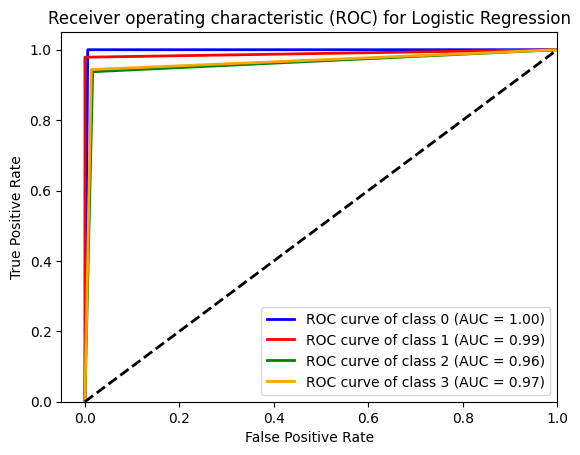

In [116]:
y_train_2 = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_2 = label_binarize(y_test, classes=[0, 1, 2, 3])
pred = label_binarize(pred, classes=[0, 1, 2, 3])
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for Logistic Regression')
plt.legend(loc="lower right")

## Curvas de aprendizaje

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

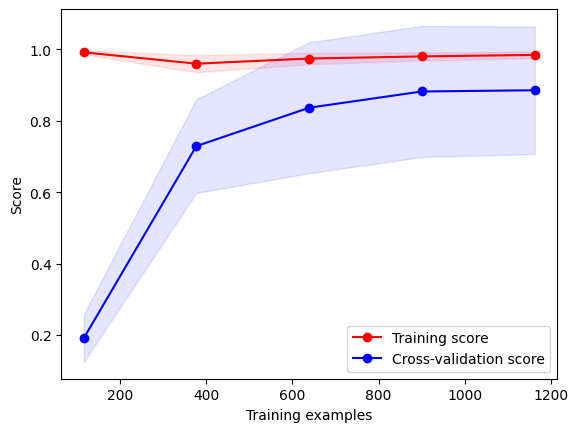

In [117]:
def plot_learning_curve(model, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    N_train, train_scores, val_scores = learning_curve(model, X, y, cv=5, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.fill_between(N_train, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(N_train, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="b")
    plt.plot(N_train, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(N_train, val_scores_mean, 'o-', color="b", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

model = LogisticRegression(solver='lbfgs', multi_class='auto')
plot_learning_curve(model, df.drop('Room_Occupancy_Count', axis=1), df['Room_Occupancy_Count'])